In [57]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

#importing own scripts
import sys
import os
current_dir = os.getcwd()
sys.path.append(os.path.join(os.path.dirname(current_dir), 'scripts'))
import own_scripts

#Configure plot style
plt.style.use('ggplot')

#Configure max columns display
pd.set_option('max_columns', 200)

#reading raw data
df = pd.read_json(path_or_buf='../data/cocktail_dataset.json')

In [58]:
df.head()

,id,name,category,glass,tags,instructions,imageUrl,alcoholic,createdAt,updatedAt,ingredients
0,11000,Mojito,Cocktail,Highball glass,"[IBA, ContemporaryClassic, Alcoholic, USA, Asi...",Muddle mint leaves with sugar and lime juice. ...,https://cocktails.solvro.pl/images/ingredients...,1,2024-08-18T19:01:17.000+00:00,2024-08-18T19:06:16.000+00:00,"[{'id': 170, 'name': 'Soda water', 'descriptio..."
1,11001,Old Fashioned,Cocktail,Old-fashioned glass,"[IBA, Classic, Alcoholic, Expensive, Savory]",Place sugar cube in old fashioned glass and sa...,https://cocktails.solvro.pl/images/ingredients...,1,2024-08-18T19:01:58.000+00:00,2024-08-18T19:06:17.000+00:00,"[{'id': 513, 'name': 'Water', 'description': '..."
2,11002,Long Island Tea,Ordinary Drink,Highball glass,"[Strong, Asia, StrongFlavor, Brunch, Vegetaria...",Combine all ingredients (except cola) and pour...,https://cocktails.solvro.pl/images/ingredients...,1,2024-08-18T19:01:58.000+00:00,2024-08-18T19:06:17.000+00:00,"[{'id': 305, 'name': 'Light Rum', 'description..."
3,11003,Negroni,Ordinary Drink,Old-fashioned glass,"[IBA, Classic]","Stir into glass over ice, garnish and serve.",https://cocktails.solvro.pl/images/ingredients...,1,2024-08-18T19:01:58.000+00:00,2024-08-18T19:06:17.000+00:00,"[{'id': 482, 'name': 'Sweet Vermouth', 'descri..."
4,11004,Whiskey Sour,Ordinary Drink,Old-fashioned glass,"[IBA, Classic, Alcoholic, ContemporaryClassic]","Shake with ice. Strain into chilled glass, gar...",https://cocktails.solvro.pl/images/ingredients...,1,2024-08-18T19:01:59.000+00:00,2024-08-18T19:06:18.000+00:00,"[{'id': 409, 'name': 'Powdered Sugar', 'descri..."


## In this case we get rid of ingredients column (and other that we won't pay attention to)

In [59]:
df = df.drop(columns=['ingredients', 'imageUrl', 'alcoholic'])
#We drop 'alcoholic' column as we know that every drink contains it

#Changing date time format
df['createdAt'] = pd.to_datetime(df['createdAt'])
df['updatedAt'] = pd.to_datetime(df['updatedAt'])

df.head()

,id,name,category,glass,tags,instructions,createdAt,updatedAt
0,11000,Mojito,Cocktail,Highball glass,"[IBA, ContemporaryClassic, Alcoholic, USA, Asi...",Muddle mint leaves with sugar and lime juice. ...,2024-08-18 19:01:17+00:00,2024-08-18 19:06:16+00:00
1,11001,Old Fashioned,Cocktail,Old-fashioned glass,"[IBA, Classic, Alcoholic, Expensive, Savory]",Place sugar cube in old fashioned glass and sa...,2024-08-18 19:01:58+00:00,2024-08-18 19:06:17+00:00
2,11002,Long Island Tea,Ordinary Drink,Highball glass,"[Strong, Asia, StrongFlavor, Brunch, Vegetaria...",Combine all ingredients (except cola) and pour...,2024-08-18 19:01:58+00:00,2024-08-18 19:06:17+00:00
3,11003,Negroni,Ordinary Drink,Old-fashioned glass,"[IBA, Classic]","Stir into glass over ice, garnish and serve.",2024-08-18 19:01:58+00:00,2024-08-18 19:06:17+00:00
4,11004,Whiskey Sour,Ordinary Drink,Old-fashioned glass,"[IBA, Classic, Alcoholic, ContemporaryClassic]","Shake with ice. Strain into chilled glass, gar...",2024-08-18 19:01:59+00:00,2024-08-18 19:06:18+00:00


In [60]:
print('DF shape: ', df.shape)
df.isna().sum()

DF shape:  (134, 8)


id               0
name             0
category         0
glass            0
tags            99
instructions     0
createdAt        0
updatedAt        0
dtype: int64

## 99 records out of 138 in 'tags' column is missing so we drop it

In [61]:
df = df.drop(columns=['tags'])

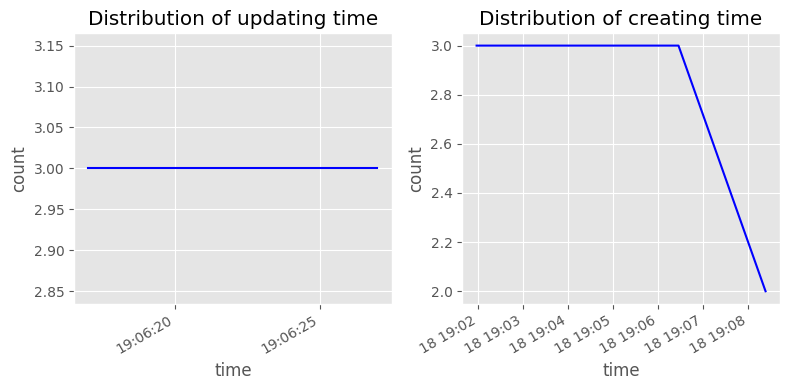

In [62]:
#checking 'updatedAt' and 'createdAt' columns

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

df['updatedAt'].value_counts().head().plot(title='Distribution of updating time', color='blue', ax=ax1)
df['createdAt'].value_counts().head().plot(title='Distribution of creating time', color='blue', ax=ax2)
ax1.set_xlabel('time')
ax1.set_ylabel('count')

ax2.set_xlabel('time')
ax2.set_ylabel('count')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

Seems that there is nothing astonishing in these columns...

# For simplicity we can assume that length of the instruction is somehow relevant to level of preparation complexity. We will try to replace textual value of instructions with the length of it. 

In [63]:
df['instructions'] = df['instructions'].apply(lambda a: len(a))

df.head()

,id,name,category,glass,instructions,createdAt,updatedAt
0,11000,Mojito,Cocktail,Highball glass,177,2024-08-18 19:01:17+00:00,2024-08-18 19:06:16+00:00
1,11001,Old Fashioned,Cocktail,Old-fashioned glass,218,2024-08-18 19:01:58+00:00,2024-08-18 19:06:17+00:00
2,11002,Long Island Tea,Ordinary Drink,Highball glass,152,2024-08-18 19:01:58+00:00,2024-08-18 19:06:17+00:00
3,11003,Negroni,Ordinary Drink,Old-fashioned glass,44,2024-08-18 19:01:58+00:00,2024-08-18 19:06:17+00:00
4,11004,Whiskey Sour,Ordinary Drink,Old-fashioned glass,148,2024-08-18 19:01:59+00:00,2024-08-18 19:06:18+00:00


# Now we will plot some of the combinations of data to understand it better

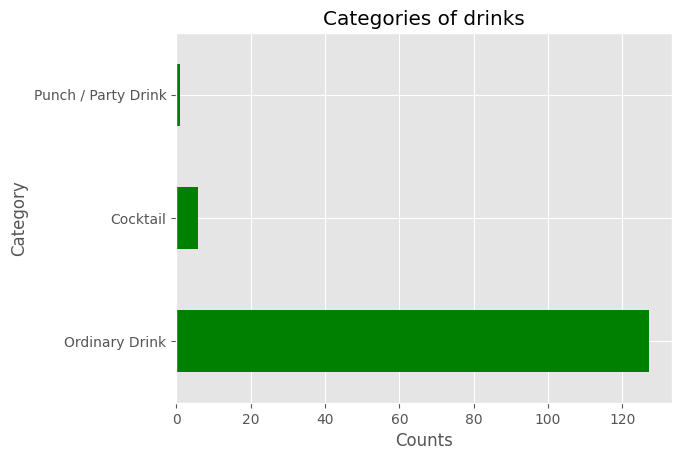

In [72]:
ax = df['category'].value_counts().head(10).plot(kind='barh', title='Categories of drinks', color='green')

ax.set_xlabel('Count of drinks')
ax.set_ylabel('Category')
plt.show()

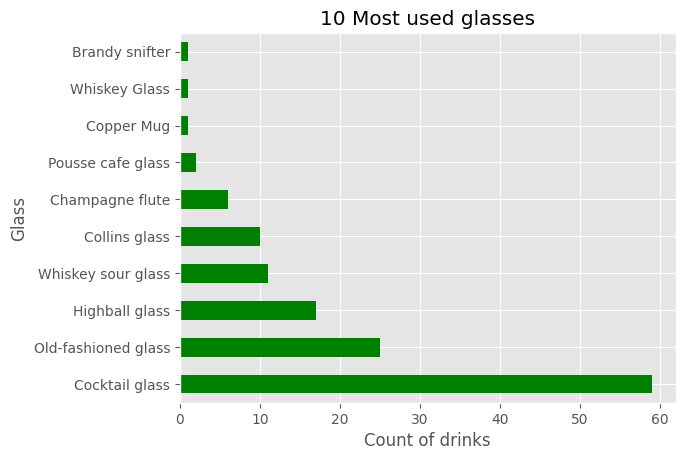

In [82]:
ax = df['glass'].value_counts().head(10).plot(kind='barh', title='10 Most used glasses', color='green')

ax.set_xlabel('Count of drinks')
ax.set_ylabel('Glass')
plt.show()

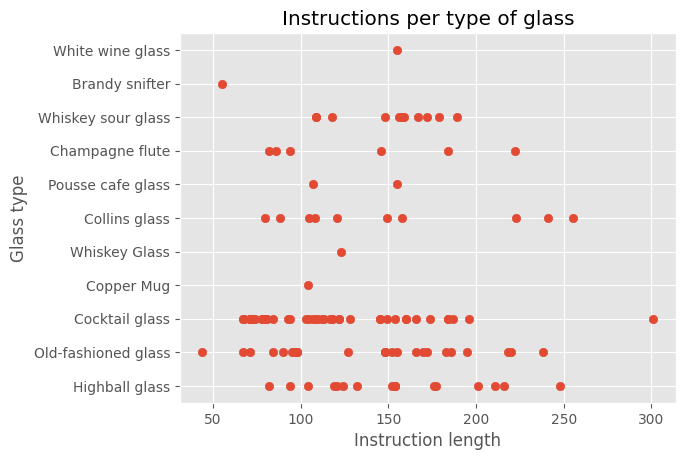

In [92]:
ax = plt.scatter(df['instructions'], df['glass'])

plt.xlabel('Instruction length')
plt.ylabel('Glass type')
plt.title('Instructions per type of glass')
plt.show()

Finally we have found something interesting! We see some relations between glass type and instruction length.

In [96]:
df[['glass', 'instructions']]

# TODO: count mean (instr. len.) of each glass to display on plot

,glass,instructions
0,Highball glass,177
1,Old-fashioned glass,218
2,Highball glass,152
3,Old-fashioned glass,44
4,Old-fashioned glass,148
...,...,...
129,Cocktail glass,71
130,Cocktail glass,72
131,Collins glass,108
132,Cocktail glass,71
